In [1]:
"""
Q1.1 We need to discretize our columns because we need our data to separated into bins for prediction. We don't want to predict the exact amount of these columns'
but rather an estimate of their value within a range as that will make our tree much simpler.

Q1.2 If we didn't bin our values we would need our decision tree to split into every single possible value which is entirely impractical and inefficient.

"""

"\nQ1.1 We need to discretize our columns because we need our data to separated into bins for prediction. We don't want to predict the exact amount of these columns'\nbut rather an estimate of their value within a range as that will make our tree much simpler.\n\nQ1.2 If we didn't bin our values we would need our decision tree to split into every single possible value which is entirely impractical and inefficient.\n\n"

In [2]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
#reading data into df
df = pd.read_csv('census_data.csv')
df2 = pd.read_csv('census_data.csv')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [4]:
#2
#Here I begin my EDA in order to identify any areas I may need to address before staring analyis
df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.hours_per_week_bin.describe()

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object

In [6]:
df.occupation_bin.describe()

count            48842
unique               5
top       c. Mid - Mid
freq             13971
Name: occupation_bin, dtype: object

In [7]:
df.msr_bin.describe()

count       48842
unique          3
top       c. High
freq        22047
Name: msr_bin, dtype: object

In [8]:
df.capital_gl_bin.describe()

count      48842
unique         3
top       a. = 0
freq       42525
Name: capital_gl_bin, dtype: object

In [9]:
df.race_sex_bin.describe()

count       48842
unique          3
top       c. High
freq        29737
Name: race_sex_bin, dtype: object

In [10]:
df.education_num_bin.describe()

count       48842
unique          5
top       b. 9-12
freq        30324
Name: education_num_bin, dtype: object

In [11]:
df.education_bin.describe()

count      48842
unique         5
top       b. Mid
freq       30324
Name: education_bin, dtype: object

In [12]:
df.workclass_bin.describe()

count         48842
unique            2
top       b. income
freq          46012
Name: workclass_bin, dtype: object

In [13]:
df.age_bin.describe()

count        48842
unique           5
top       e. 40-55
freq         13963
Name: age_bin, dtype: object

In [14]:
df.flag.describe()

count     48842
unique        2
top       train
freq      32561
Name: flag, dtype: object

In [15]:
df.y.describe()

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [16]:
df.shape

(48842, 11)

In [17]:
df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [18]:
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [20]:
df.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


Data looks good overall but I need to encode in order to run a decision tree as these values won't run smoothly.

In [21]:

#saving a copy of the dataframe so I can access it for the header names later. Also, I like to keep a backup df just in case. 
labels_df = df2
labels_df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [22]:
#checking the values of a column before the transformation
labels_df['age_bin'].unique()
labels_df['education_bin'].unique()

array(['c. Bachelors', 'b. Mid', 'a. Low', 'd. Masters', 'e. High'],
      dtype=object)

In [23]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in columns
df['hours_per_week_bin']= label_encoder.fit_transform(df['hours_per_week_bin']) 
df['occupation_bin']= label_encoder.fit_transform(df['occupation_bin'])
df['msr_bin']= label_encoder.fit_transform(df['msr_bin']) 
df['capital_gl_bin']= label_encoder.fit_transform(df['capital_gl_bin']) 
df['race_sex_bin']= label_encoder.fit_transform(df['race_sex_bin']) 
df['education_num_bin']= label_encoder.fit_transform(df['education_num_bin']) 
df['education_bin']= label_encoder.fit_transform(df['education_bin'])  
df['workclass_bin']= label_encoder.fit_transform(df['workclass_bin']) 
df['age_bin']= label_encoder.fit_transform(df['age_bin']) 

df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


In [24]:
df['age_bin'].unique()
#confirming values are encoded

array([3, 4, 1, 2, 0])

In [25]:
#3
#created a function in order to automate my graphing. this function accepts the column name and the number of unique values in the column.
#It will run a loop through the number of unqiue values and generate a percentage based on how frequent that value appears. This repeats for the number 
# of unique values. next, since the percentage is out of 1 I simply need to subtract my first value from 1 to get the other percentage. I run a loop
# to create a list of these values. Finally, I zip the lists together and create a dataframe which I can use to plot my charts.
def flag_func(name_col, nums):
  list_result = []
  for num in range(nums):
    list_result.append(len(df[name_col][(df.y == 0) & (df[name_col] == num)])/len(df[name_col][(df[name_col] == num)]))
  alternate_list = []
  for result in list_result:
    alternate_list.append(1-result)
  temp_df = pd.DataFrame(zip(list_result, alternate_list), columns=[0,1], index=sorted(list(labels_df[name_col].unique())))
  temp_df = temp_df * 100
  temp_df.plot.bar(stacked=True, title=name_col)
  return(temp_df)

,0,1
a. 0-25,98.244521,1.755479
b. 26-30 & 71-100,86.138755,13.861245
c. 31-35 & 61-70,75.729200,24.270800
d. 36-40 & 56-60,66.898174,33.101826
e. 40-55,61.806202,38.193798


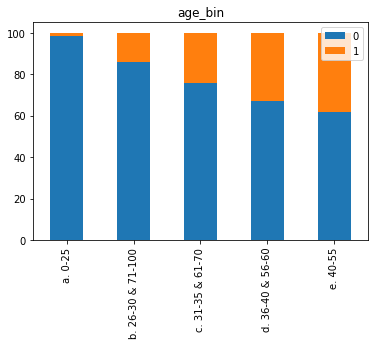

In [26]:
#I call my function on each column in order to generate a graph. 
flag_func('age_bin', 5)

,0,1
a. = 0,81.065256,18.934744
b. < 0,49.868536,50.131464
c. > 0,38.265180,61.734820


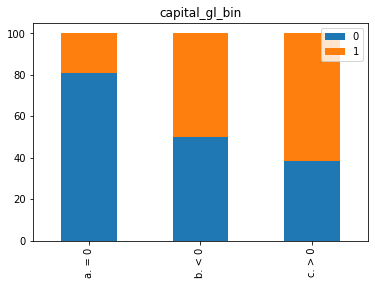

In [ ]:
flag_func('capital_gl_bin', 3)

,0,1
a. 0-8,94.288390,5.711610
b. 9-12,81.859253,18.140747
c. 13,58.716511,41.283489
d. 14,45.088446,54.911554
e. 15+,26.610644,73.389356


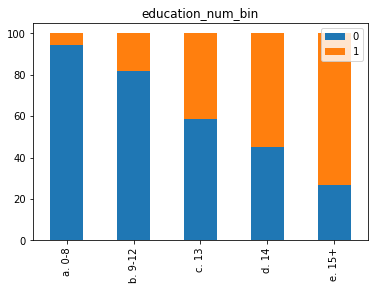

In [ ]:
flag_func('education_num_bin', 5)

,0,1
a. 0-30,93.300217,6.699783
b. 31-40,79.657645,20.342355
c. 71-100,65.503876,34.496124
d. 41-50 & 61-70,60.780120,39.219880
e. 51-60,56.797020,43.202980


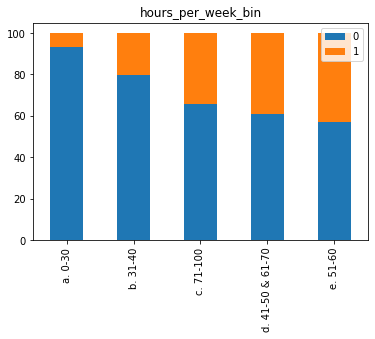

In [ ]:
flag_func('hours_per_week_bin', 5)

,0,1
a. Low,98.389311,1.610689
b. Mid,90.093269,9.906731
c. High,54.919037,45.080963


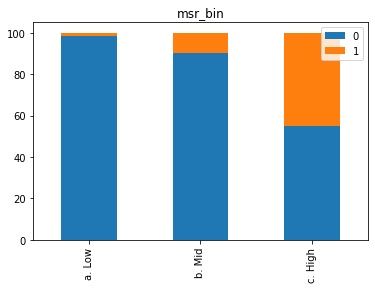

In [ ]:
flag_func('msr_bin', 3)

,0,1
a. Low,95.232831,4.767169
b. Mid - Low,87.773229,12.226771
c. Mid - Mid,76.100494,23.899506
d. Mid - High,70.028818,29.971182
e. High,53.565019,46.434981


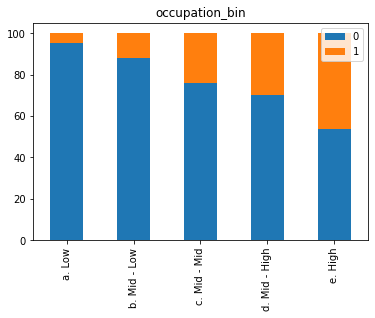

In [ ]:
flag_func('occupation_bin', 5)

,0,1
a. Low,94.033233,5.966767
b. Mid,87.093638,12.906362
c. High,68.372734,31.627266


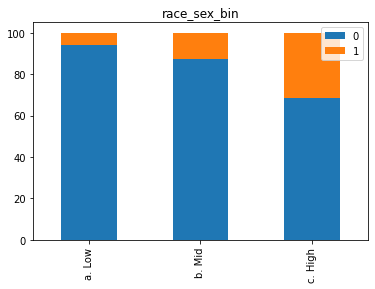

In [ ]:
flag_func('race_sex_bin', 3)

In [27]:
#import the necessary packages for our decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=99, max_features = None, min_samples_leaf = 1000, min_samples_split = 1000)

In [28]:
#splitting data
test_df = df[df.flag == 'test']
train_df = df[df.flag == 'train']

In [29]:
#selecting specific columns for analysis
y_train = train_df.y
y_test = test_df.y

x_train = train_df.drop(['flag', 'y'], axis = 'columns')
x_test = test_df.drop(['flag', 'y'], axis = 'columns')

In [30]:
#fitting model
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


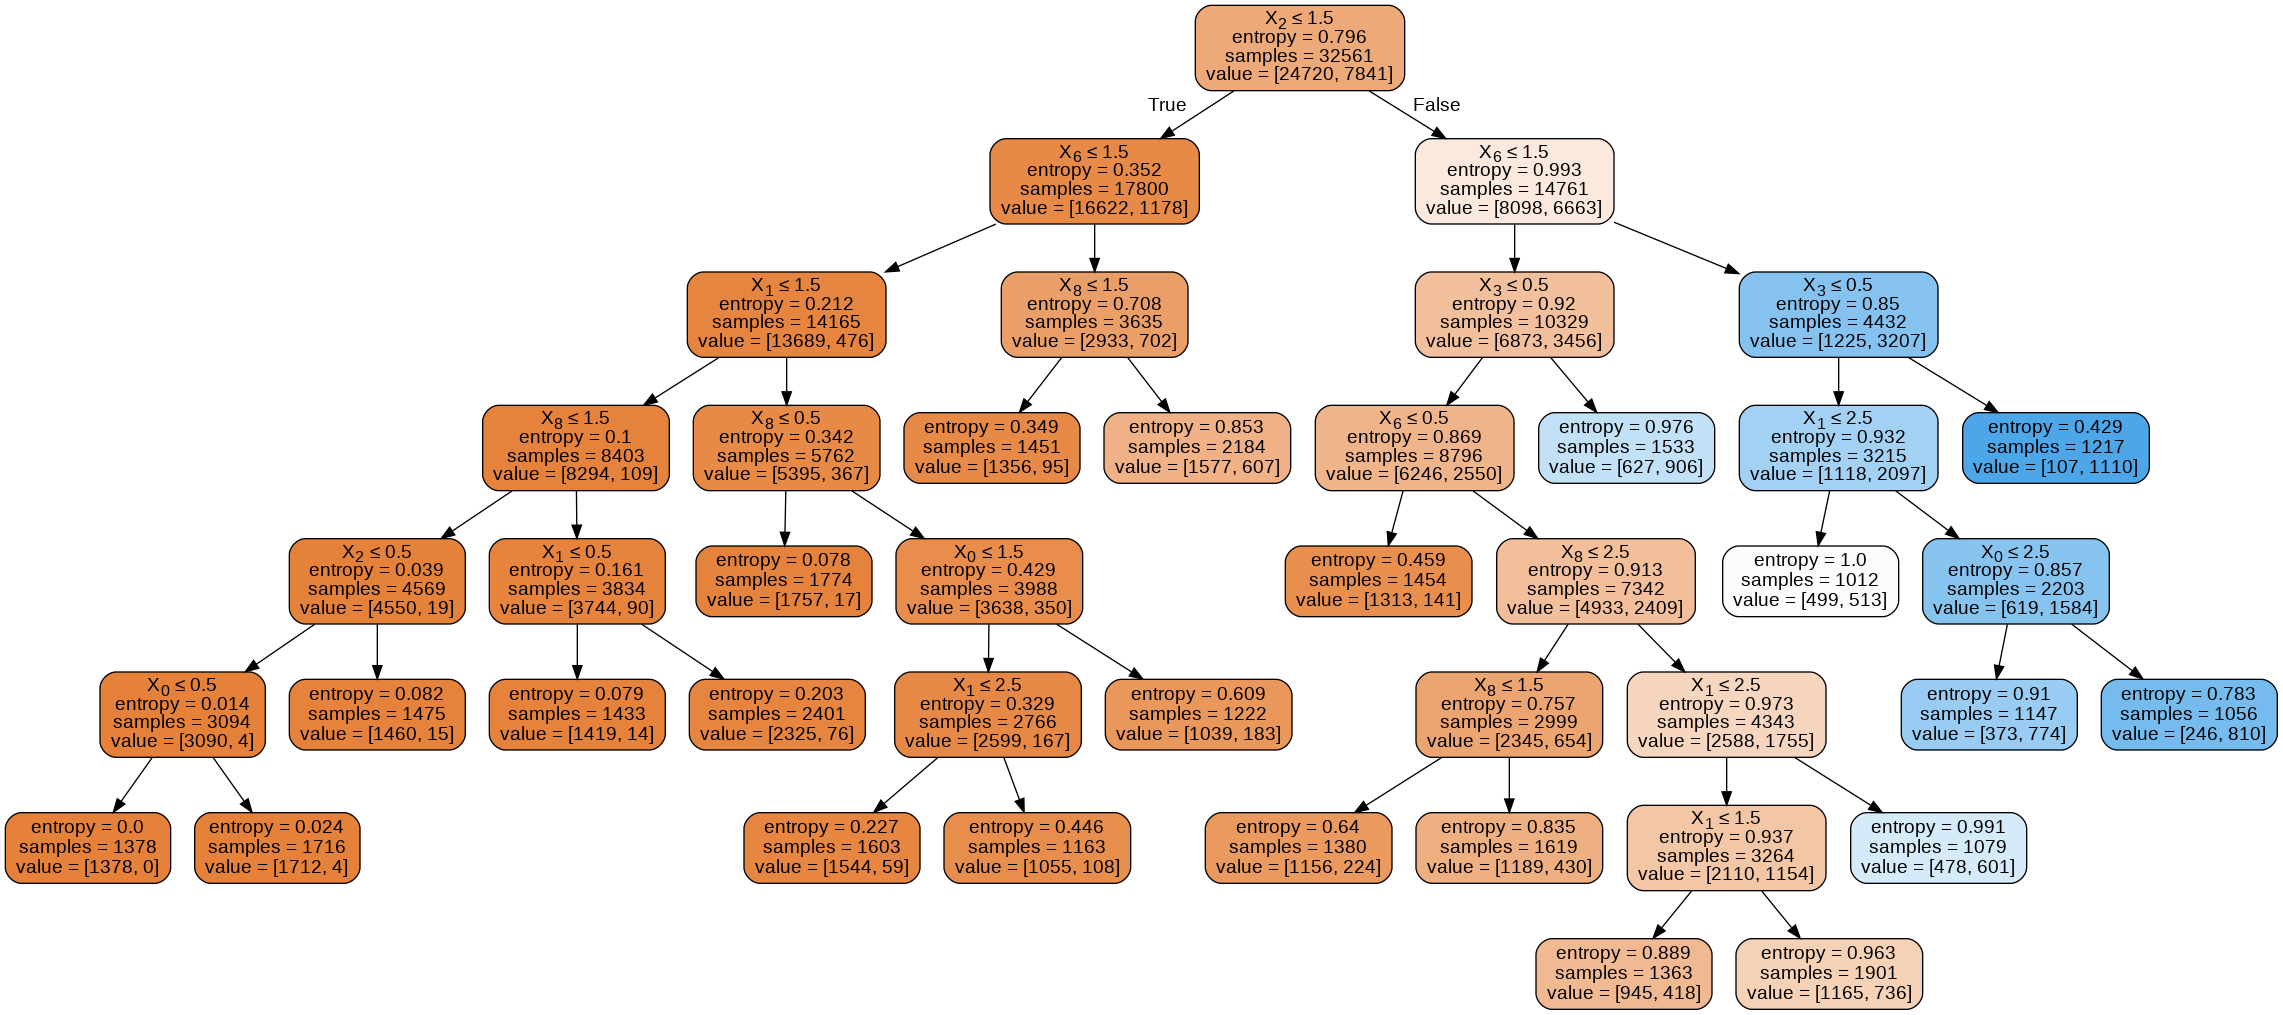

In [31]:
#5
#graphing the decison tree using the following packages.
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
#6
#Running tests to judge the accuracy of my model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11275,  1160],
       [ 1540,  2306]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8341625207296849

In [34]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8291558830865177

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5995839833593344

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8311011724314925

0.7531494504653528


Text(0.5, 1.0, 'ROC curve')

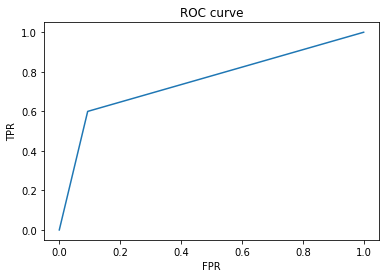

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [38]:
#7
#created a function to automatically run these tests for different criteria
def dtree_Scoring(criterion, depth, leaf, split):
  dtree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=101,
                               max_features = None, min_samples_leaf = leaf, min_samples_split = split)
  dtree.fit(x_train, y_train)
  y_pred = dtree.predict(x_test)
  print('Scoring Chart for the following inputs:', 'criterion =',criterion, ',', 'depth =', depth,',', 'leaf =', leaf,',', 'split =', split)
  print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
  print('Accuracy Score: ', accuracy_score(y_test, y_pred))
  print('Precision Score: ',precision_score(y_test, y_pred, average='weighted'))
  print('Recall Score: ', recall_score(y_test, y_pred))
  print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
  print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

  fpr, tpr, _ = roc_curve(y_test, y_pred)

  plt.plot(fpr, tpr)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 250 , split = 500
Confusion Matrix:  [[11446   989]
 [ 1651  2195]]
Accuracy Score:  0.837847798046803
Precision Score:  0.8303435791516517
Recall Score:  0.5707228289131565
F1 Score:  0.8323151969285115
ROC AUC Score:  0.7455946271626499


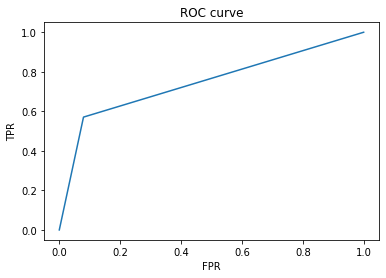

In [39]:
#Calling my function the different sets of criteria
dtree_Scoring('gini', None, 250, 500)

Scoring Chart for the following inputs: criterion = gini , depth = 4 , leaf = 250 , split = 500
Confusion Matrix:  [[11605   830]
 [ 1866  1980]]
Accuracy Score:  0.8344082058841594
Precision Score:  0.8244272082794002
Recall Score:  0.514820592823713
F1 Score:  0.8248321729578761
ROC AUC Score:  0.7240367539912694


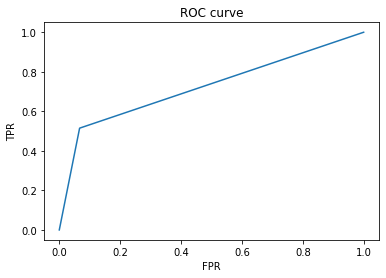

In [40]:
dtree_Scoring('gini', 4, 250, 500)

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 400 , split = 500
Confusion Matrix:  [[11513   922]
 [ 1754  2092]]
Accuracy Score:  0.8356366316565321
Precision Score:  0.8267602254815588
Recall Score:  0.5439417576703068
F1 Score:  0.8283297120698255
ROC AUC Score:  0.7348981003872241


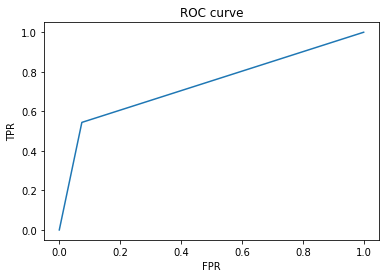

In [41]:
dtree_Scoring('gini', None, 400, 500)

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 250 , split = 600
Confusion Matrix:  [[11446   989]
 [ 1651  2195]]
Accuracy Score:  0.837847798046803
Precision Score:  0.8303435791516517
Recall Score:  0.5707228289131565
F1 Score:  0.8323151969285115
ROC AUC Score:  0.7455946271626499


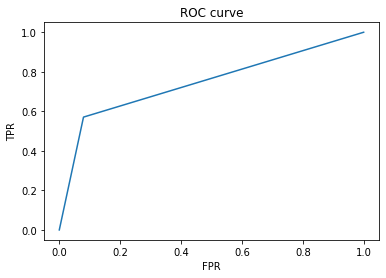

In [42]:
dtree_Scoring('gini', None, 250, 600)

Scoring Chart for the following inputs: criterion = entropy , depth = None , leaf = 250 , split = 500
Confusion Matrix:  [[11470   965]
 [ 1659  2187]]
Accuracy Score:  0.8388305386647011
Precision Score:  0.8311666007765293
Recall Score:  0.5686427457098284
F1 Score:  0.8330265329912792
ROC AUC Score:  0.745519603655075


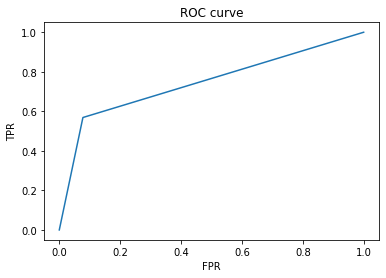

In [43]:
dtree_Scoring('entropy', None, 250, 500)

Scoring Chart for the following inputs: criterion = entropy , depth = 4 , leaf = 250 , split = 500
Confusion Matrix:  [[11605   830]
 [ 1866  1980]]
Accuracy Score:  0.8344082058841594
Precision Score:  0.8244272082794002
Recall Score:  0.514820592823713
F1 Score:  0.8248321729578761
ROC AUC Score:  0.7240367539912694


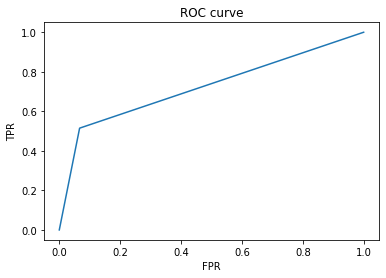

In [44]:
dtree_Scoring('entropy', 4, 250, 500)

Scoring Chart for the following inputs: criterion = entropy , depth = None , leaf = 400 , split = 500
Confusion Matrix:  [[11394  1041]
 [ 1625  2221]]
Accuracy Score:  0.8362508445427185
Precision Score:  0.8292808741603134
Recall Score:  0.5774830993239729
F1 Score:  0.831402428824731
ROC AUC Score:  0.7468838898308647


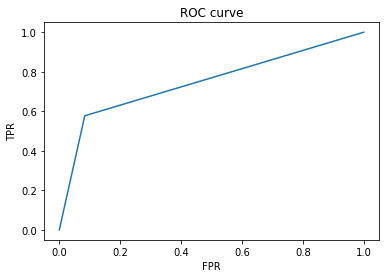

In [45]:
dtree_Scoring('entropy', None, 400, 500)

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 250 , split = 600
Confusion Matrix:  [[11446   989]
 [ 1651  2195]]
Accuracy Score:  0.837847798046803
Precision Score:  0.8303435791516517
Recall Score:  0.5707228289131565
F1 Score:  0.8323151969285115
ROC AUC Score:  0.7455946271626499


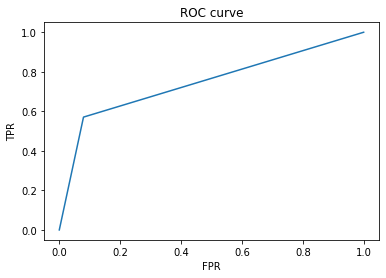

In [46]:
dtree_Scoring('gini', None, 250, 600)

In [47]:
#7.1/9
#Created a function to accept a list of different specifications then, score each attribute according to those specifications and append that to a list.
#After that has iterated through every feature in the list it creates a dataframe with all the data to easily display the information.
def dtree_Scoring_table(value_lists):
  criteria = ['criterion', 'depth', 'leaf', 'split']
  data_dict = []
  for values in value_lists:
      my_dict = {criteria[i]: values[i] for i in range(len(values))}
        
      dtree = DecisionTreeClassifier(criterion=my_dict['criterion'], max_depth=my_dict['depth'], random_state=101,
                                    max_features = None, min_samples_leaf = my_dict['leaf'], min_samples_split = my_dict['split'])
      dtree.fit(x_train, y_train)
      y_pred = dtree.predict(x_test)

      acc_score = accuracy_score(y_test, y_pred)
      rec_score = recall_score(y_test, y_pred)
      prec_score = precision_score(y_test, y_pred, average='weighted')
      scored_f = f1_score(y_test, y_pred, average='weighted')

      listed_values  = [my_dict['criterion'], my_dict['split'], my_dict['leaf'], my_dict['depth'], acc_score, rec_score, prec_score, scored_f]
      headers = ['Split Criteria', 'Minimum Sample Split', 'Minimum Sample Leaf', 'Maximum Depth', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
      final_dict = {headers[i]: listed_values[i] for i in range(len(headers))}
      data_dict.append(final_dict)
  return pd.DataFrame(data_dict, columns=headers)

In [48]:
specifications = [['gini', None, 250, 500], ['gini', 4, 250, 500], ['gini', None, 400, 500], ['gini', None, 250, 600], ['entropy', None, 250, 500], ['entropy', 4, 250, 500], ['entropy', None, 400, 500], ['entropy', None, 250, 600]]

In [49]:
dtree_Scoring_table(specifications)

,Split Criteria,Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,gini,500,250,NaN,0.837848,0.570723,0.830344,0.832315
1,gini,500,250,4.0,0.834408,0.514821,0.824427,0.824832
2,gini,500,400,NaN,0.835637,0.543942,0.826760,0.828330
3,gini,600,250,NaN,0.837848,0.570723,0.830344,0.832315
4,entropy,500,250,NaN,0.838831,0.568643,0.831167,0.833027
5,entropy,500,250,4.0,0.834408,0.514821,0.824427,0.824832
6,entropy,500,400,NaN,0.836251,0.577483,0.829281,0.831402
7,entropy,600,250,NaN,0.838831,0.568643,0.831167,0.833027


In [50]:
#8.1
%time 
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
#7.39 ms

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


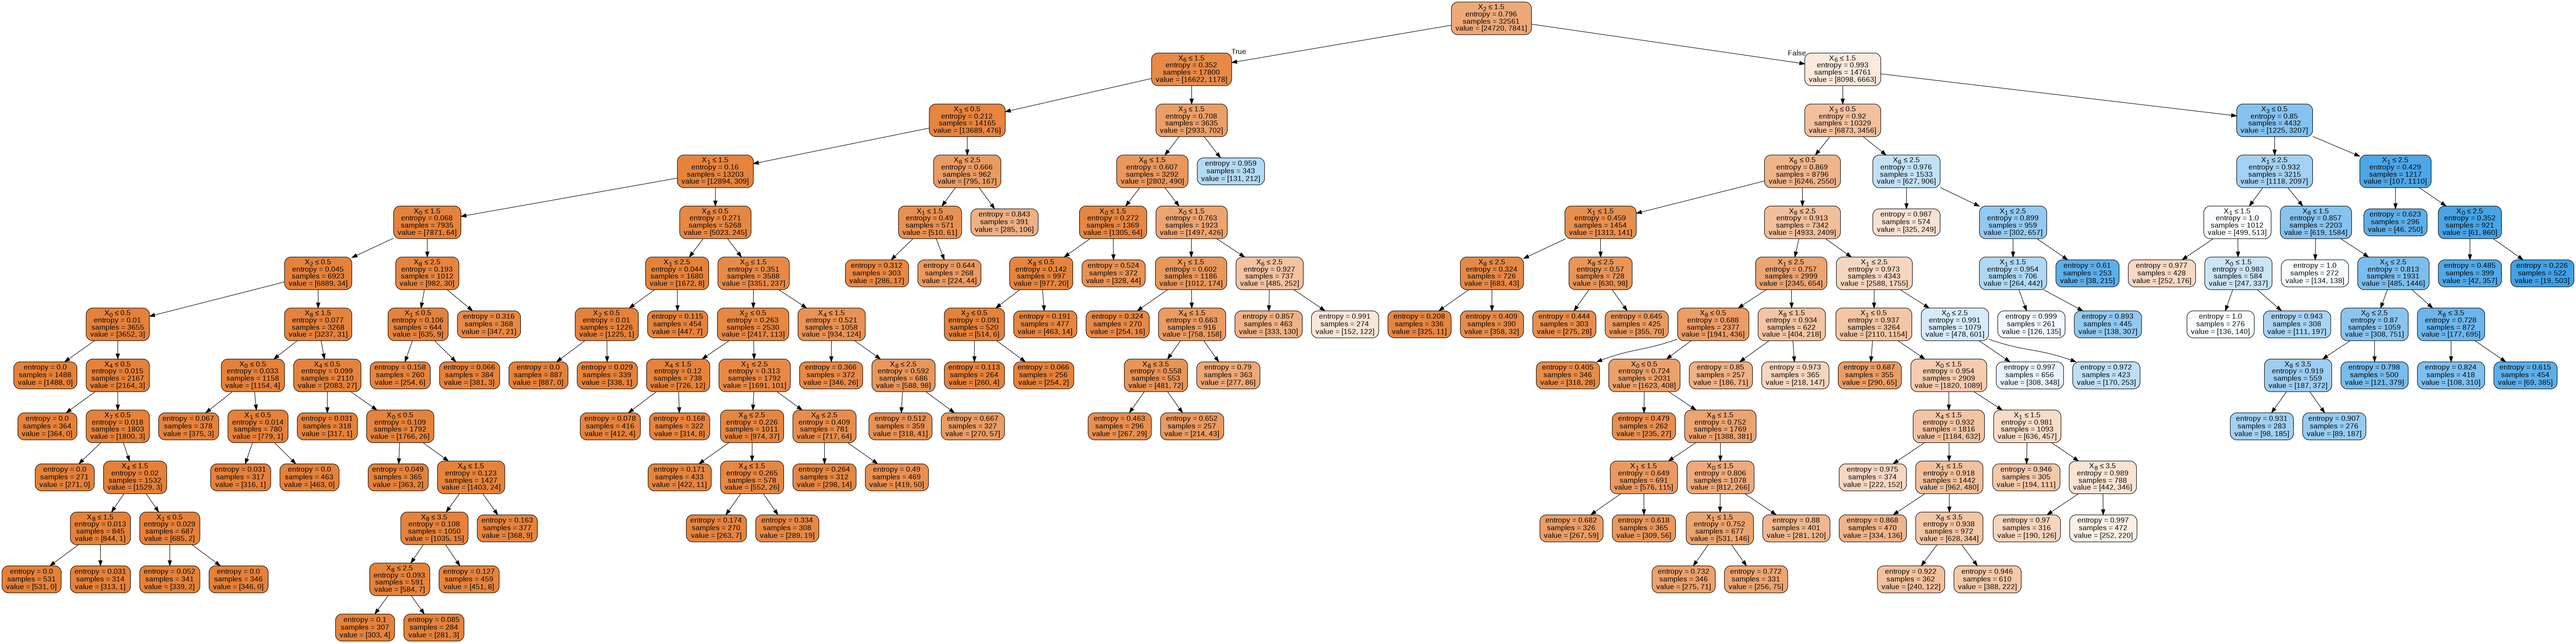

In [53]:
#8.2
#The best tree in my tests was a test based on entropy with a minimum sample split of 500, minimum leaf size of 250, and no depth limit.

#8.3 graphing tree below
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=99,
                               max_features = None, min_samples_leaf = 250, min_samples_split = 500)

dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#8.4 This is the best tree because it has the highest accuracy score without compromising much in regards to precision and recall. This model is likely to predict the right answer
#with similar precision and recall scores to its competitors.

In [ ]:
#9 automated the table already above for number 7.1

In [54]:
#10 Based on my tree I predict that the person's income will be greater than 50k.
import numpy as np
new_test = [3, 1, 2, 2, 1, 1, 4, 1, 3]
new_test = np.array(new_test).reshape(1, -1)
y_pred = dtree.predict(new_test)
y_pred

array([1])